In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('Behavioral_Risk.csv')

In [24]:
df['Question'].where(df['Class']=='Demographics').unique()

array([nan, 'What is your age?',
       'Adults who are limited in any activities because of physical, mental, or emotional problems',
       'Adults with health problem(s) that requires the use of special equipment',
       'What is your race/ethnicity?',
       'What is the highest grade or year of school you completed?',
       'What is your employment status?',
       'What is your annual household income?',
       'What is your marital status?',
       'How many children live in your household? (variable calculated from one or more BRFSS questions)',
       'Gender of respondent',
       'Are you blind or do you have serious difficulty seeing, even when wearing glasses?',
       'Do you have serious difficulty concentrating, remembering, or making decisions?',
       'Do you have difficulty doing errands alone?',
       'Do you have difficulty dressing or bathing?',
       'Do you have serious difficulty walking or climbing stairs?',
       'Have you used the internet in the past 

In [22]:
df['Locationdesc'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Connecticut', 'Colorado', 'Delaware', 'Florida', 'Georgia',
       'District of Columbia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'North Carolina', 'Ohio', 'New York',
       'North Dakota', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'South Carolina', 'South Dakota', 'Rhode Island', 'Tennessee',
       'Texas', 'Utah', 'Virginia', 'Washington', 'Vermont',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Guam',
       'All States and DC (median) **', 'Puerto Rico',
       'All States, DC and Territories (median) **', 'Virgin Islands'],
      dtype=object)

In [2]:
# look at the columns in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148740 entries, 0 to 1148739
Data columns (total 27 columns):
Year                          1148740 non-null int64
Locationabbr                  1148740 non-null object
Locationdesc                  1148740 non-null object
Class                         1148740 non-null object
Topic                         1148740 non-null object
Question                      1148740 non-null object
Response                      1148740 non-null object
Break_Out                     1148740 non-null object
Break_Out_Category            1148740 non-null object
Sample_Size                   1148740 non-null int64
Data_value                    972079 non-null float64
Confidence_limit_Low          970207 non-null float64
Confidence_limit_High         970207 non-null float64
Display_order                 1148146 non-null float64
Data_value_unit               1148740 non-null object
Data_value_type               1148740 non-null object
Data_Value_Footnote_Symb

In [3]:
# number of missing values for each column

df.isnull().sum()

Year                               0
Locationabbr                       0
Locationdesc                       0
Class                              0
Topic                              0
Question                           0
Response                           0
Break_Out                          0
Break_Out_Category                 0
Sample_Size                        0
Data_value                    176661
Confidence_limit_Low          178533
Confidence_limit_High         178533
Display_order                    594
Data_value_unit                    0
Data_value_type                    0
Data_Value_Footnote_Symbol    972079
Data_Value_Footnote           972079
DataSource                         0
ClassId                            0
TopicId                            0
LocationID                         0
BreakoutID                         0
BreakOutCategoryID                 0
QuestionID                         0
ResponseID                         0
GeoLocation                     1878
d

In [4]:
df['Class'].value_counts()

Demographics                    405607
Chronic Health Indicators       234576
Health Care Access/Coverage      82226
Tobacco Use                      61602
Health Status                    53654
Alcohol Consumption              46001
Physical Activity                38268
Immunization                     32537
Overweight and Obesity (BMI)     30618
Cholesterol Awareness            26754
Colorectal Cancer Screening      25151
Women's Health                   24530
Oral Health                      21762
Injury                           21679
HIV-AIDS                         10455
Fruits and Vegetables            10404
E-Cigarette Use                   8436
Hypertension Awareness            7644
Prostate Cancer                   6836
Name: Class, dtype: int64

In [3]:
# we drop columns that have more than 50% of data missing

df.drop(axis=1, columns=['Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'DataSource'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148740 entries, 0 to 1148739
Data columns (total 24 columns):
Year                     1148740 non-null int64
Locationabbr             1148740 non-null object
Locationdesc             1148740 non-null object
Class                    1148740 non-null object
Topic                    1148740 non-null object
Question                 1148740 non-null object
Response                 1148740 non-null object
Break_Out                1148740 non-null object
Break_Out_Category       1148740 non-null object
Sample_Size              1148740 non-null int64
Data_value               972079 non-null float64
Confidence_limit_Low     970207 non-null float64
Confidence_limit_High    970207 non-null float64
Display_order            1148146 non-null float64
Data_value_unit          1148740 non-null object
Data_value_type          1148740 non-null object
ClassId                  1148740 non-null object
TopicId                  1148740 non-null object
Locati

In [4]:
# fill missing values with median values

nul_cols = ['Data_value', 'Confidence_limit_Low', 'Confidence_limit_High', 'Display_order']

for col in nul_cols:
    df[col].fillna(df[col].mean(), inplace=True)

In [5]:
# we need only the data related to demographics

demogr = pd.DataFrame(df.loc[df['Class']=='Demographics'])
demogr.head

<bound method NDFrame.head of          Year Locationabbr                                Locationdesc  \
56       2011           AL                                     Alabama   
152      2011           AL                                     Alabama   
495      2011           AL                                     Alabama   
639      2011           AL                                     Alabama   
969      2011           AL                                     Alabama   
970      2011           AL                                     Alabama   
971      2011           AL                                     Alabama   
972      2011           AL                                     Alabama   
973      2011           AL                                     Alabama   
974      2011           AL                                     Alabama   
975      2011           AL                                     Alabama   
976      2011           AL                                     Alabama   
977     

In [9]:
demogr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405607 entries, 56 to 1148673
Data columns (total 24 columns):
Year                     405607 non-null int64
Locationabbr             405607 non-null object
Locationdesc             405607 non-null object
Class                    405607 non-null object
Topic                    405607 non-null object
Question                 405607 non-null object
Response                 405607 non-null object
Break_Out                405607 non-null object
Break_Out_Category       405607 non-null object
Sample_Size              405607 non-null int64
Data_value               405607 non-null float64
Confidence_limit_Low     405607 non-null float64
Confidence_limit_High    405607 non-null float64
Display_order            405607 non-null float64
Data_value_unit          405607 non-null object
Data_value_type          405607 non-null object
ClassId                  405607 non-null object
TopicId                  405607 non-null object
LocationID           

In [10]:
demogr.isnull().sum()

Year                       0
Locationabbr               0
Locationdesc               0
Class                      0
Topic                      0
Question                   0
Response                   0
Break_Out                  0
Break_Out_Category         0
Sample_Size                0
Data_value                 0
Confidence_limit_Low       0
Confidence_limit_High      0
Display_order              0
Data_value_unit            0
Data_value_type            0
ClassId                    0
TopicId                    0
LocationID                 0
BreakoutID                 0
BreakOutCategoryID         0
QuestionID                 0
ResponseID                 0
GeoLocation              692
dtype: int64

In [11]:
demogr.isnull().sum()

Year                       0
Locationabbr               0
Locationdesc               0
Class                      0
Topic                      0
Question                   0
Response                   0
Break_Out                  0
Break_Out_Category         0
Sample_Size                0
Data_value                 0
Confidence_limit_Low       0
Confidence_limit_High      0
Display_order              0
Data_value_unit            0
Data_value_type            0
ClassId                    0
TopicId                    0
LocationID                 0
BreakoutID                 0
BreakOutCategoryID         0
QuestionID                 0
ResponseID                 0
GeoLocation              692
dtype: int64

In [6]:
# irrelevant fields

#demogr.drop(axis=1, columns=['Year', 'GeoLocation'], inplace=True)
df.drop(axis=1, columns=['Year', 'GeoLocation'], inplace=True)


In [7]:
# we convert categorical values to numerical

data = pd.get_dummies(demogr)
data = data.sample(frac=0.1, replace=True)

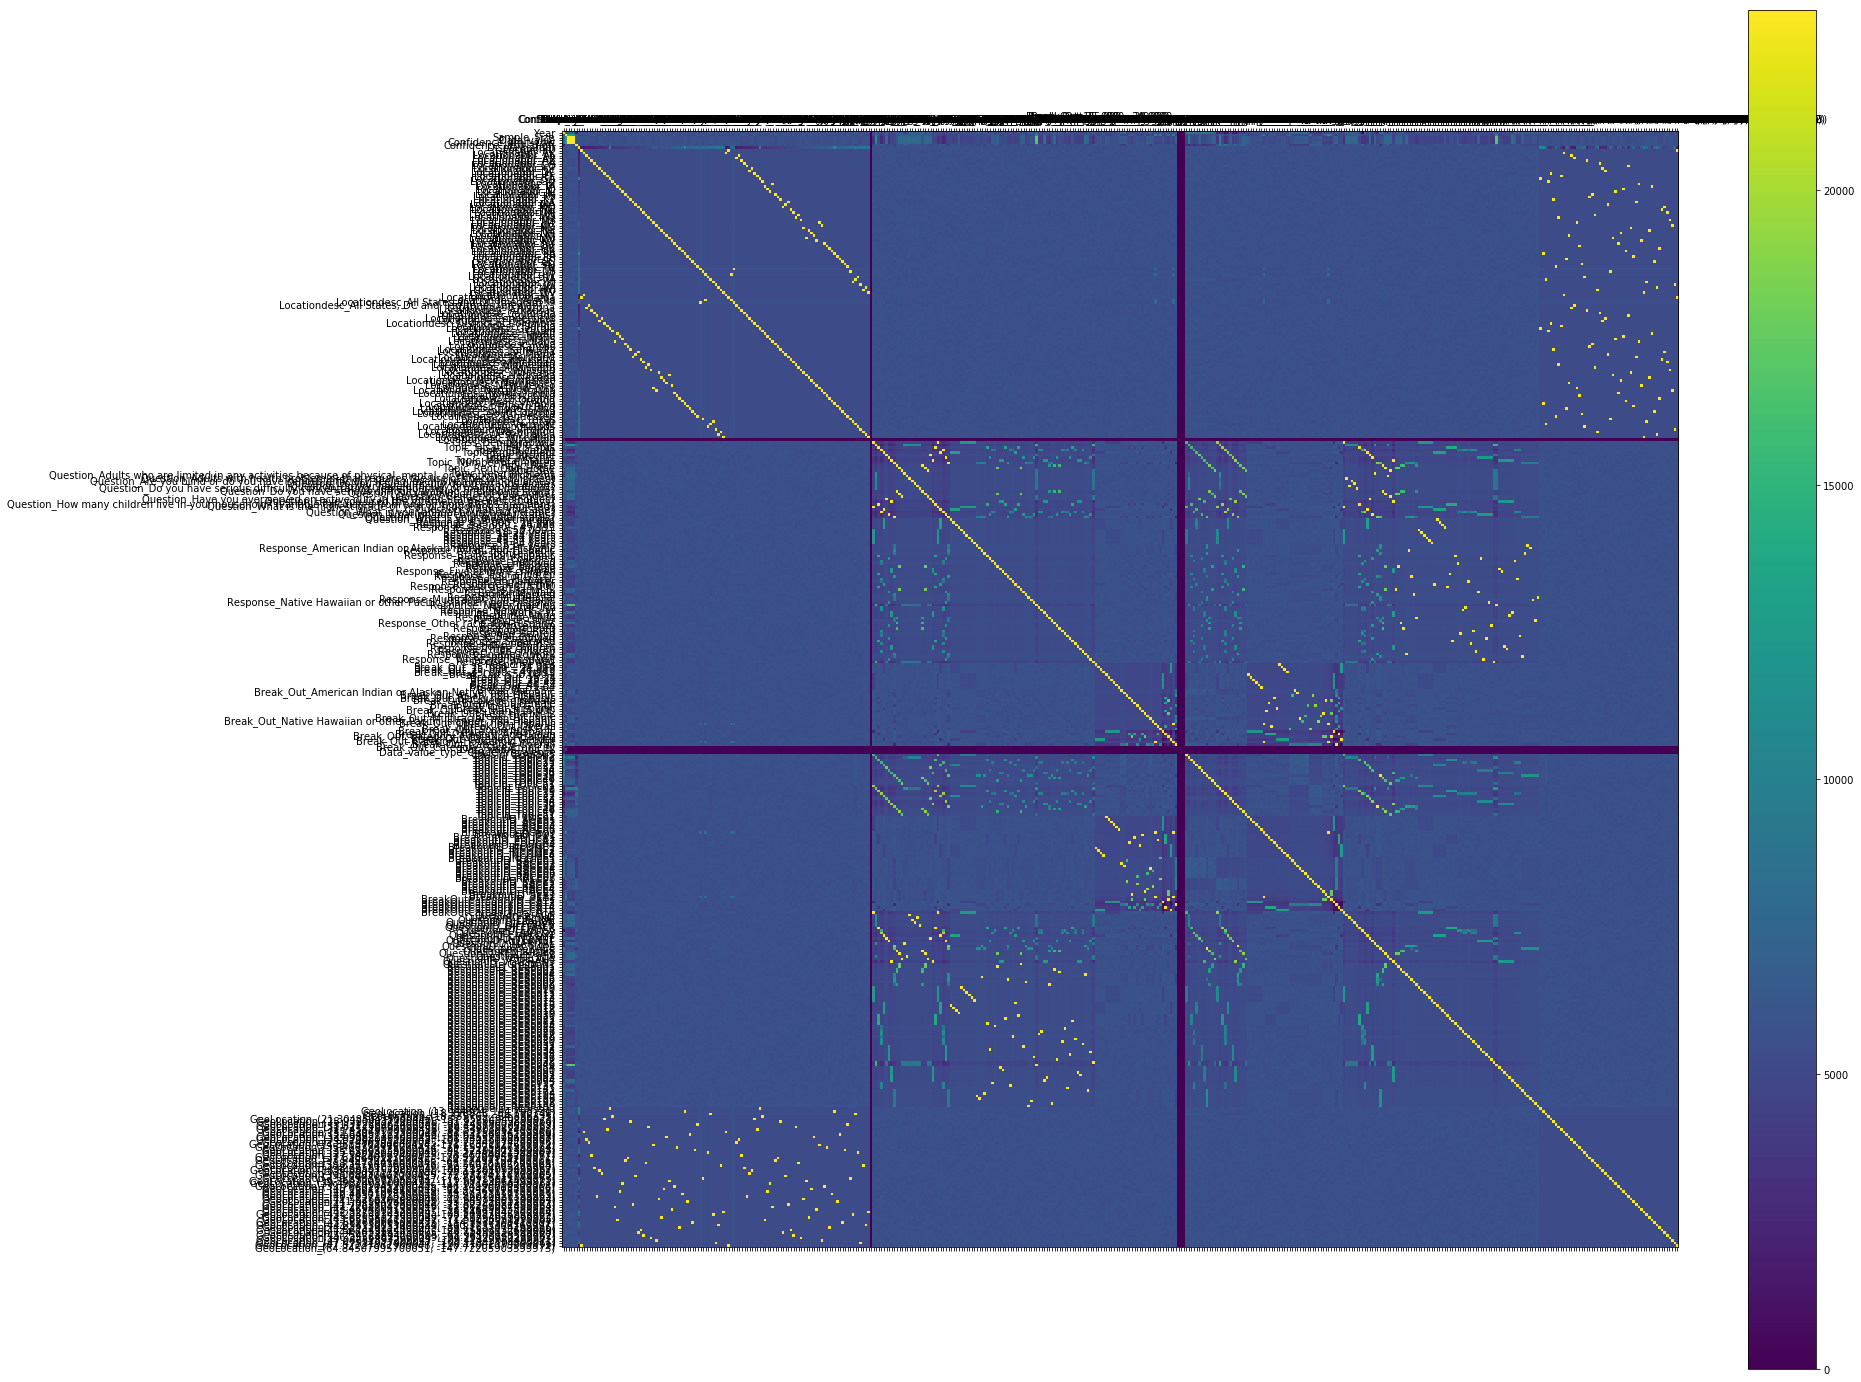

In [14]:
# plot correlation matrix to see how many of the columns are related to each other

import matplotlib.pyplot as plt
%matplotlib inline

def plot_corr(data,size=25):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = data.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(data, interpolation='nearest')
    ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

plot_corr(data)

In [8]:
# we need to drop highly correlated columns because they do not provide information

# Create correlation matrix

corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [16]:
#columns to drop

to_drop

['Confidence_limit_Low',
 'Confidence_limit_High',
 'Locationdesc_Alabama',
 'Locationdesc_Alaska',
 'Locationdesc_All States and DC (median) **',
 'Locationdesc_All States, DC and Territories (median) **',
 'Locationdesc_Arizona',
 'Locationdesc_Arkansas',
 'Locationdesc_California',
 'Locationdesc_Colorado',
 'Locationdesc_Connecticut',
 'Locationdesc_Delaware',
 'Locationdesc_District of Columbia',
 'Locationdesc_Florida',
 'Locationdesc_Georgia',
 'Locationdesc_Guam',
 'Locationdesc_Hawaii',
 'Locationdesc_Idaho',
 'Locationdesc_Illinois',
 'Locationdesc_Indiana',
 'Locationdesc_Iowa',
 'Locationdesc_Kansas',
 'Locationdesc_Kentucky',
 'Locationdesc_Louisiana',
 'Locationdesc_Maine',
 'Locationdesc_Maryland',
 'Locationdesc_Massachusetts',
 'Locationdesc_Michigan',
 'Locationdesc_Minnesota',
 'Locationdesc_Mississippi',
 'Locationdesc_Missouri',
 'Locationdesc_Montana',
 'Locationdesc_Nebraska',
 'Locationdesc_Nevada',
 'Locationdesc_New Hampshire',
 'Locationdesc_New Jersey',
 'Lo

In [9]:
data.drop(columns = to_drop, axis=1, inplace = True)

In [18]:
data.describe()

,Year,Sample_Size,Data_value,Display_order,LocationID,Locationabbr_AK,Locationabbr_AL,Locationabbr_AR,Locationabbr_AZ,Locationabbr_CA,...,BreakoutID_RACE06,BreakoutID_RACE07,BreakoutID_RACE08,BreakoutID_RACE1,BreakoutID_RACE2,BreakoutID_RACE3,BreakoutID_RACE4,BreakoutID_RACE5,QuestionID_EMPLOY,QuestionID_EMPLOY1
count,40561.000000,40561.000000,40561.000000,40561.000000,40561.000000,40561.000000,40561.000000,40561.000000,40561.000000,40561.000000,...,40561.000000,40561.000000,40561.000000,40561.000000,40561.000000,40561.000000,40561.000000,40561.000000,40561.000000,40561.000000
mean,2013.792831,567.551614,31.796167,552.024856,30.719065,0.017850,0.019181,0.019329,0.019132,0.019206,...,0.014349,0.014201,0.015261,0.026429,0.026060,0.024556,0.025813,0.026281,0.047509,0.101082
std,1.653862,1226.290967,27.130942,832.605023,17.595242,0.132406,0.137162,0.137680,0.136989,0.137249,...,0.118925,0.118320,0.122591,0.160410,0.159314,0.154768,0.158579,0.159973,0.212727,0.301441
min,2011.000000,0.000000,0.140000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,33.000000,9.700000,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,145.000000,22.900000,29.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2015.000000,536.000000,40.280424,1366.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016.000000,23061.000000,100.000000,2618.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


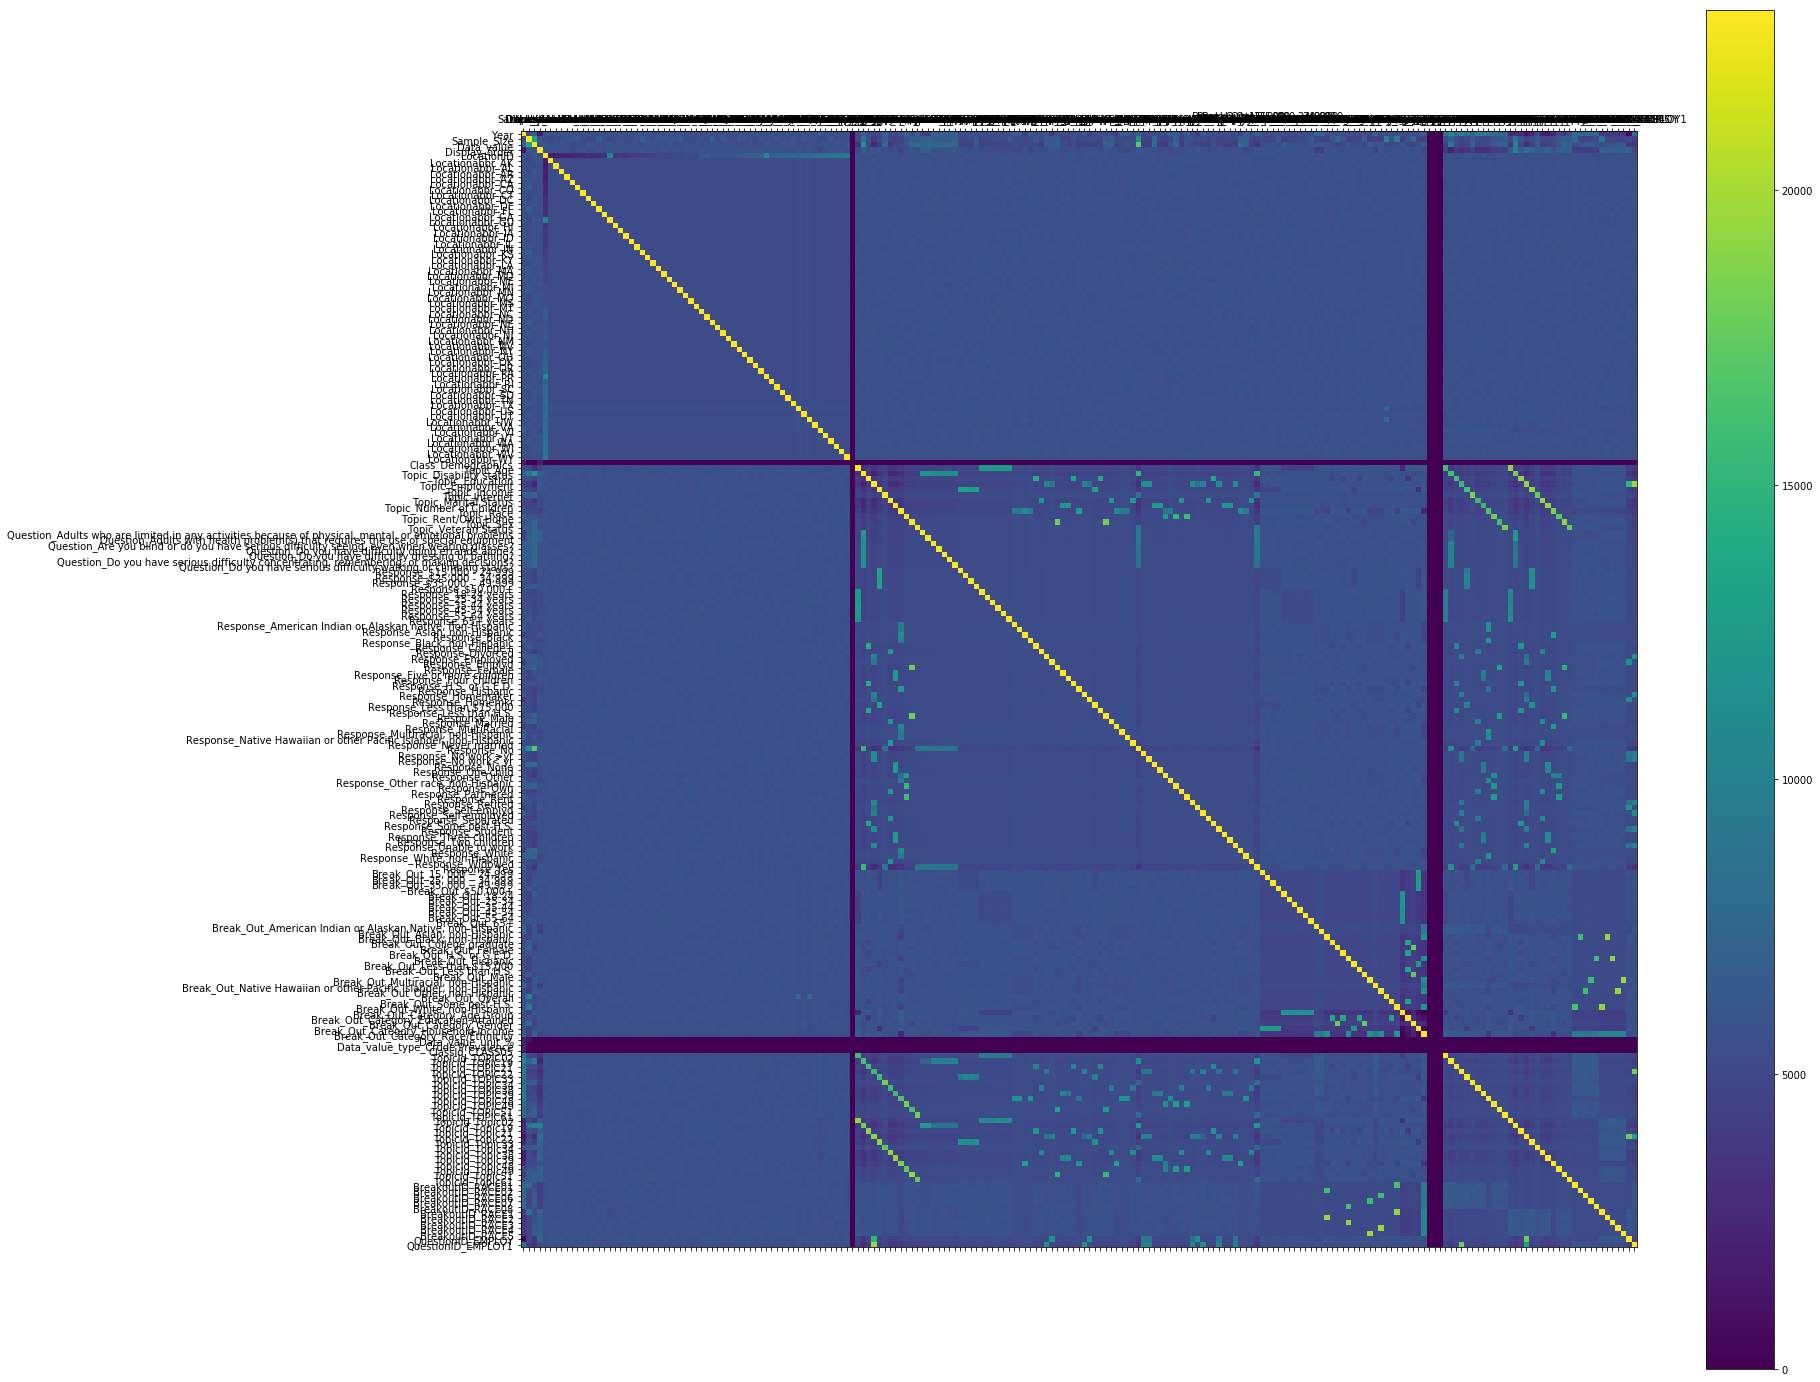

In [19]:
#we see that we removed all of highly correlated columns

plot_corr(data)

In [10]:
#split the data into test and train parts


from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3)

In [11]:
from sklearn.decomposition import PCA
import renders as rs
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
# Instantiate
pca = PCA(n_components=6)
# Fit
pca.fit(train)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(test)

# Generate PCA results plot
pca_results = rs.pca_results(train, pca)

In [12]:
# DataFrame of results
display(pca_results)

# DataFrame
display(type(pca_results))

# Cumulative explained variance should add to 1
display(pca_results['Explained Variance'].cumsum())

,Explained Variance,Year,Sample_Size,Data_value,Display_order,LocationID,Locationabbr_AK,Locationabbr_AL,Locationabbr_AR,Locationabbr_AZ,...,BreakoutID_RACE06,BreakoutID_RACE07,BreakoutID_RACE08,BreakoutID_RACE1,BreakoutID_RACE2,BreakoutID_RACE3,BreakoutID_RACE4,BreakoutID_RACE5,QuestionID_EMPLOY,QuestionID_EMPLOY1
Dimension 1,0.6964,-0.0000,0.9994,0.0094,0.0339,-0.0003,-0.0000,-0.0000,-0.0000,0.0000,...,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000
Dimension 2,0.3032,-0.0004,-0.0339,-0.0003,0.9994,0.0001,-0.0000,-0.0000,0.0000,-0.0000,...,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000
Dimension 3,0.0003,-0.0076,0.0093,-0.9992,0.0000,-0.0350,-0.0001,-0.0000,-0.0001,0.0001,...,-0.0004,-0.0004,-0.0002,0.0007,-0.0002,-0.0003,-0.0002,-0.0005,0.0008,0.0013
Dimension 4,0.0001,0.0006,0.0007,-0.0350,-0.0001,0.9994,-0.0019,-0.0018,-0.0016,-0.0016,...,-0.0000,-0.0000,-0.0000,0.0001,-0.0001,-0.0001,-0.0001,-0.0002,0.0001,-0.0001
Dimension 5,0.0000,-0.9914,-0.0001,0.0079,-0.0005,0.0008,0.0002,0.0003,0.0001,-0.0002,...,-0.0074,-0.0071,-0.0076,0.0082,0.0103,0.0102,0.0094,0.0124,0.0388,-0.0322
Dimension 6,0.0000,0.0227,0.0000,0.0063,0.0000,0.0002,0.0015,-0.0030,0.0015,0.0015,...,0.0043,0.0052,0.0042,0.0034,0.0077,0.0069,0.0081,0.0124,0.1133,0.3010


pandas.core.frame.DataFrame

Dimension 1    0.6964
Dimension 2    0.9996
Dimension 3    0.9999
Dimension 4    1.0000
Dimension 5    1.0000
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

In [13]:
# TODO: Apply PCA by fitting the good data with reduced dimensions
# Instantiate
pca = PCA(n_components=2)
pca.fit(train)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(train)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(test)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [14]:
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score
# Create range of clusters 
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [25]:
# Loop through clusters
for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GMM(n_components=n_clusters).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    #sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='mahalanobis', sample_size=10000)
    print("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecatio

For n_clusters = 2. The average silhouette_score is : 0.36750468519664026


/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecatio

For n_clusters = 3. The average silhouette_score is : 0.6882692765361


/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecatio

For n_clusters = 4. The average silhouette_score is : 0.6393047391580442


/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecatio

/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77

For n_clusters = 5. The average silhouette_score is : 0.4064258762330198


/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecatio

For n_clusters = 6. The average silhouette_score is : 0.44875828027398385


/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecatio

/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77

For n_clusters = 7. The average silhouette_score is : 0.3521330511971248


/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecatio

/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77

/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77

For n_clusters = 8. The average silhouette_score is : 0.1808925849848931


/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecatio

/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77

/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77

For n_clusters = 9. The average silhouette_score is : 0.18056542866132255


/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecatio

/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/alexander/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77

For n_clusters = 10. The average silhouette_score is : 0.2225766917350427


In [26]:
# Loop through clusters
for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='euclidean', sample_size=10000)
    print("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.7417059085548723
For n_clusters = 3. The average silhouette_score is : 0.6813350610949085
For n_clusters = 4. The average silhouette_score is : 0.7090631754763315
For n_clusters = 5. The average silhouette_score is : 0.7129393168579624
For n_clusters = 6. The average silhouette_score is : 0.7141152112125058
For n_clusters = 7. The average silhouette_score is : 0.702802376793079
For n_clusters = 8. The average silhouette_score is : 0.6611787671973914
For n_clusters = 9. The average silhouette_score is : 0.6158768004291096
For n_clusters = 10. The average silhouette_score is : 0.6256894432081301


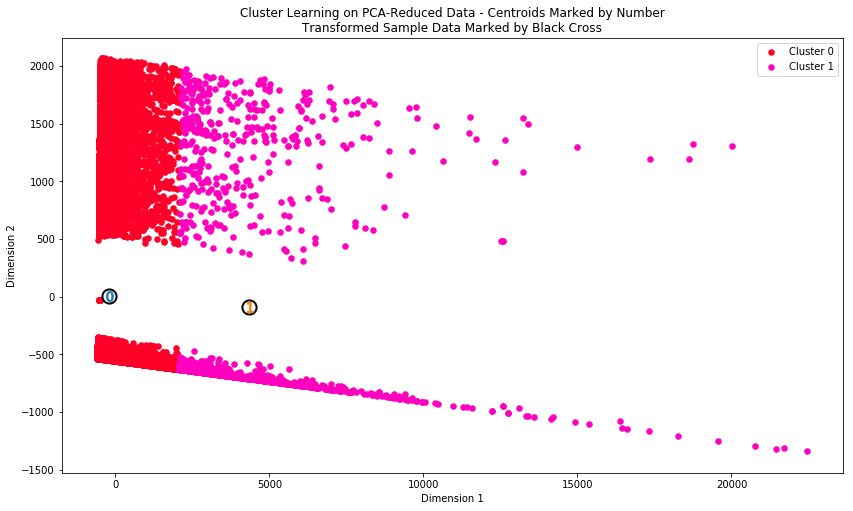

In [27]:
clusterer = KMeans(n_clusters=2).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)

# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

/home/alexander/.local/lib/python3.6/site-packages/sklearn/cluster/birch.py:77: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  node1_dist, node2_dist = dist[[farthest_idx]]


NameError: name 'c3' is not defined

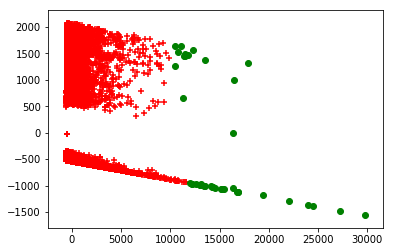

In [19]:
from sklearn.cluster import Birch

db = Birch(threshold = 200, n_clusters=2).fit(reduced_data)
preds = db.fit_predict(reduced_data)
labels = db.labels_
sample_preds = db.fit_predict(pca_samples)

import matplotlib.pyplot as pl
for i in range(0, preds.shape[0]):
    if preds[i] == 0:
        c1 = pl.scatter(reduced_data.at[i, 'Dimension 1'],reduced_data.at[i, 'Dimension 2'],c='r', marker='+')
    elif preds[i] == 1:
        c2 = pl.scatter(reduced_data.at[i, 'Dimension 1'],reduced_data.at[i, 'Dimension 2'],c='g', marker='o')
    elif preds[i] == -1:
        c3 = pl.scatter(reduced_data.at[i, 'Dimension 1'],reduced_data.at[i, 'Dimension 2'],c='b', marker='*')
        
pl.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
pl.title('DBSCAN finds 2 clusters and noise')
pl.show()

In [28]:
# Loop through clusters
for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = MiniBatchKMeans(n_clusters=n_clusters).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='euclidean', sample_size=10000)
    print("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.6044414516137392
For n_clusters = 3. The average silhouette_score is : 0.6874849302870579
For n_clusters = 4. The average silhouette_score is : 0.7042681381872441
For n_clusters = 5. The average silhouette_score is : 0.6464006818314495
For n_clusters = 6. The average silhouette_score is : 0.6796826539134199
For n_clusters = 7. The average silhouette_score is : 0.6022752328007793
For n_clusters = 8. The average silhouette_score is : 0.5872290363817914
For n_clusters = 9. The average silhouette_score is : 0.6266621622540784
For n_clusters = 10. The average silhouette_score is : 0.603911037793084


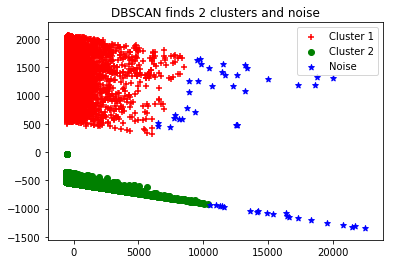

In [29]:
db = DBSCAN(eps = 400).fit(reduced_data)
preds = db.fit_predict(reduced_data)
labels = db.labels_
sample_preds = db.fit_predict(pca_samples)

import matplotlib.pyplot as pl
for i in range(0, preds.shape[0]):
    if preds[i] == 0:
        c1 = pl.scatter(reduced_data.at[i, 'Dimension 1'],reduced_data.at[i, 'Dimension 2'],c='r', marker='+')
    elif preds[i] == 1:
        c2 = pl.scatter(reduced_data.at[i, 'Dimension 1'],reduced_data.at[i, 'Dimension 2'],c='g', marker='o')
    elif preds[i] == -1:
        c3 = pl.scatter(reduced_data.at[i, 'Dimension 1'],reduced_data.at[i, 'Dimension 2'],c='b', marker='*')
        
pl.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
pl.title('DBSCAN finds 2 clusters and noise')
pl.show()

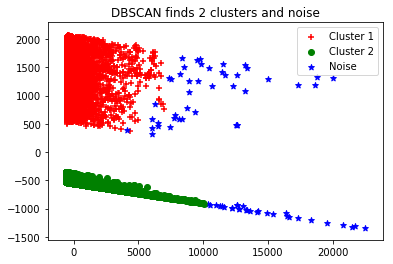

In [30]:
db = DBSCAN(eps = 300).fit(reduced_data)
preds = db.fit_predict(reduced_data)
labels = db.labels_
sample_preds = db.fit_predict(pca_samples)

import matplotlib.pyplot as pl
for i in range(0, preds.shape[0]):
    if preds[i] == 0:
        c1 = pl.scatter(reduced_data.at[i, 'Dimension 1'],reduced_data.at[i, 'Dimension 2'],c='r', marker='+')
    elif preds[i] == 1:
        c2 = pl.scatter(reduced_data.at[i, 'Dimension 1'],reduced_data.at[i, 'Dimension 2'],c='g', marker='o')
    elif preds[i] == -1:
        c3 = pl.scatter(reduced_data.at[i, 'Dimension 1'],reduced_data.at[i, 'Dimension 2'],c='b', marker='*')
        
pl.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
pl.title('DBSCAN finds 2 clusters and noise')
pl.show()

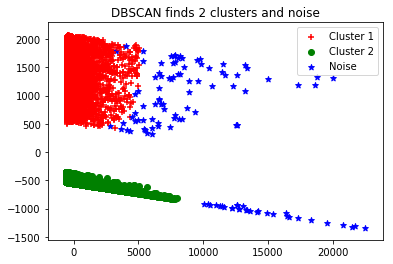

In [31]:
db = DBSCAN(eps = 200).fit(reduced_data)
preds = db.fit_predict(reduced_data)
labels = db.labels_
sample_preds = db.fit_predict(pca_samples)

import matplotlib.pyplot as pl
for i in range(0, preds.shape[0]):
    if preds[i] == 0:
        c1 = pl.scatter(reduced_data.at[i, 'Dimension 1'],reduced_data.at[i, 'Dimension 2'],c='r', marker='+')
    elif preds[i] == 1:
        c2 = pl.scatter(reduced_data.at[i, 'Dimension 1'],reduced_data.at[i, 'Dimension 2'],c='g', marker='o')
    elif preds[i] == -1:
        c3 = pl.scatter(reduced_data.at[i, 'Dimension 1'],reduced_data.at[i, 'Dimension 2'],c='b', marker='*')
        
pl.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
pl.title('DBSCAN finds 2 clusters and noise')
pl.show()

In [32]:
health = pd.DataFrame(df.loc[df['Class']=='Health Status'])
health.head

<bound method NDFrame.head of         Locationabbr                                Locationdesc  \
2007              AL                                     Alabama   
2008              AL                                     Alabama   
2009              AL                                     Alabama   
2010              AL                                     Alabama   
2011              AL                                     Alabama   
2013              AL                                     Alabama   
2014              AL                                     Alabama   
2015              AL                                     Alabama   
2016              AL                                     Alabama   
2017              AL                                     Alabama   
2018              AL                                     Alabama   
2019              AL                                     Alabama   
2020              AL                                     Alabama   
2021              

In [34]:
health.isnull().sum()

Locationabbr             0
Locationdesc             0
Class                    0
Topic                    0
Question                 0
Response                 0
Break_Out                0
Break_Out_Category       0
Sample_Size              0
Data_value               0
Confidence_limit_Low     0
Confidence_limit_High    0
Display_order            0
Data_value_unit          0
Data_value_type          0
ClassId                  0
TopicId                  0
LocationID               0
BreakoutID               0
BreakOutCategoryID       0
QuestionID               0
ResponseID               0
dtype: int64

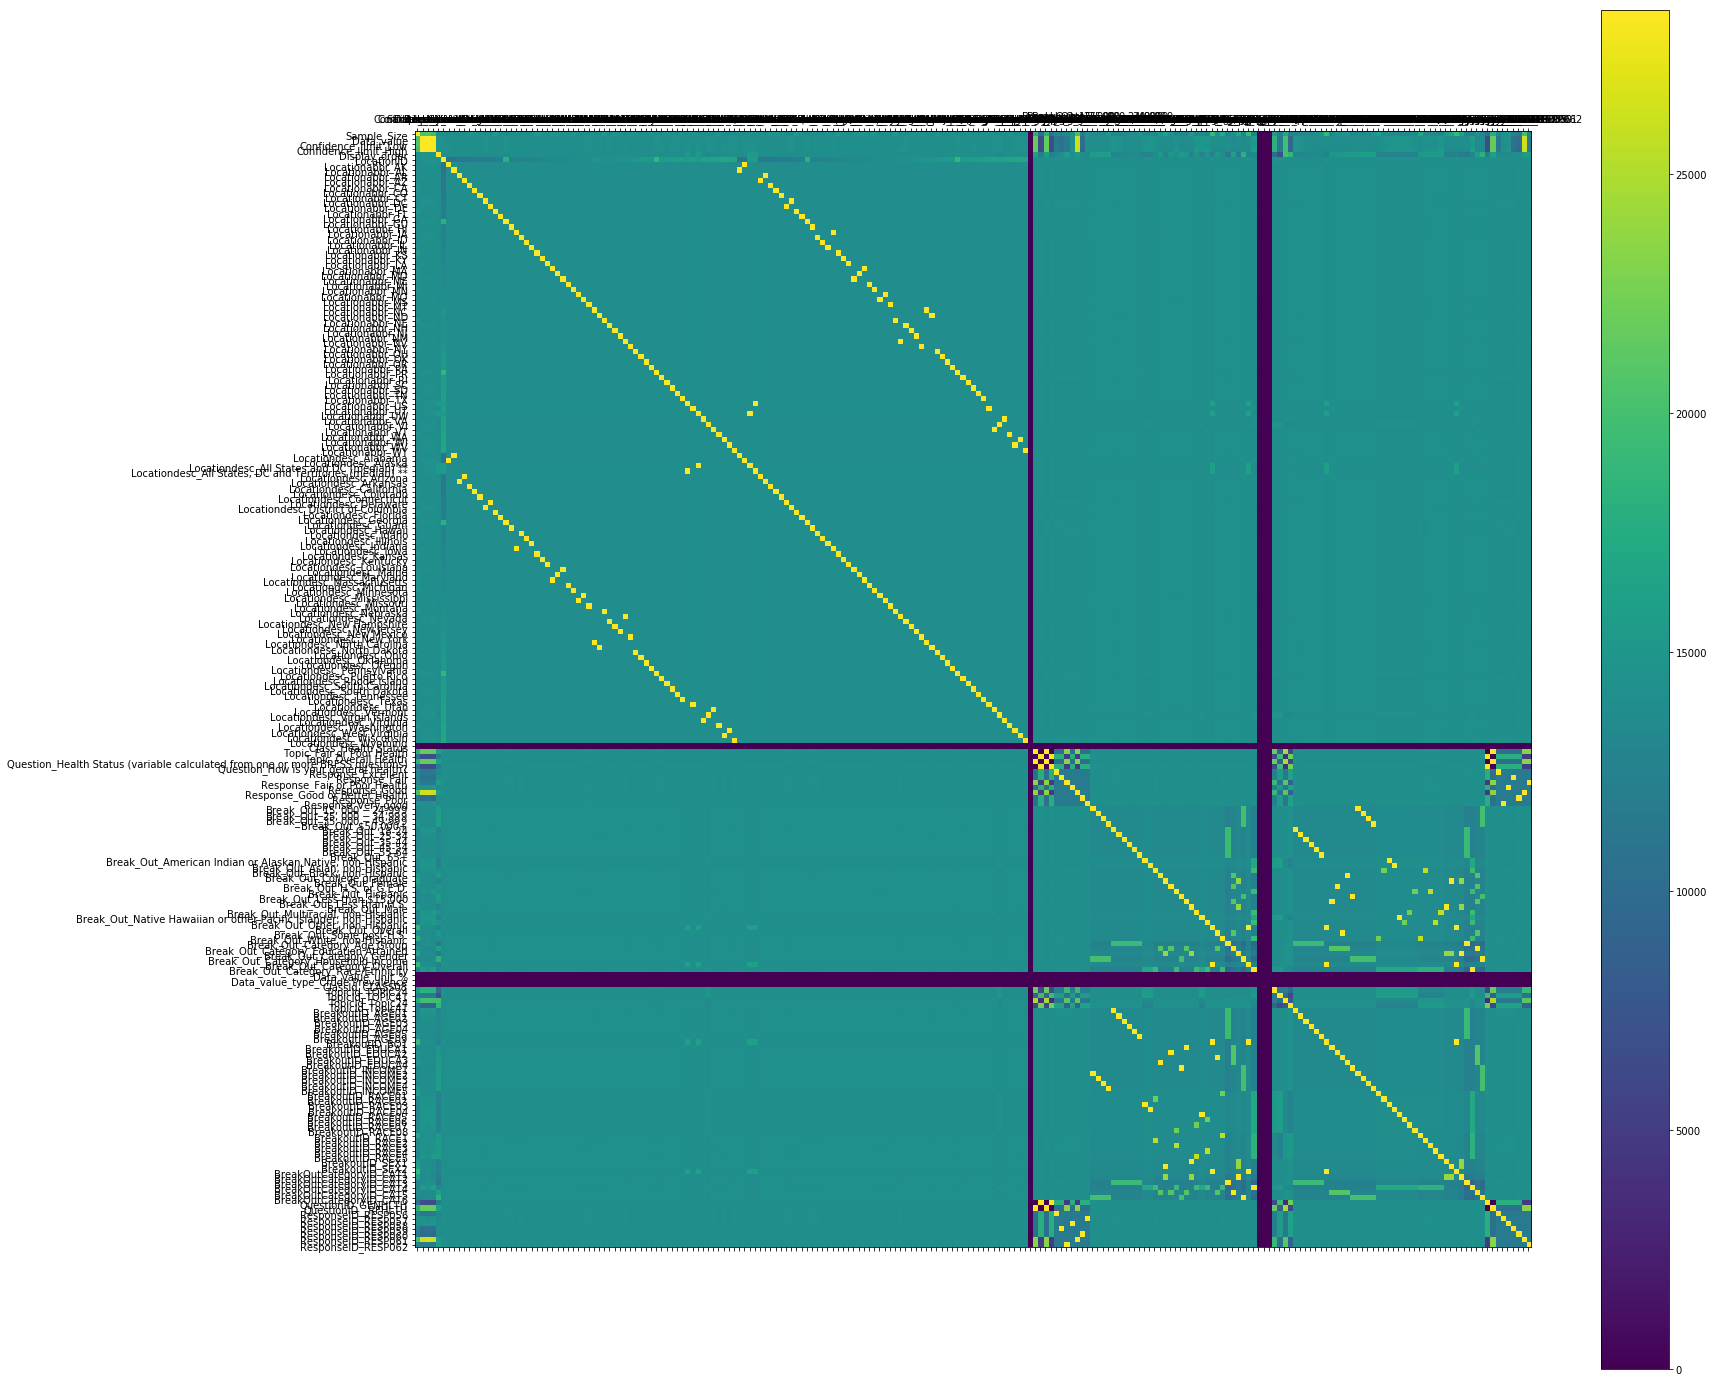

In [37]:
health = pd.get_dummies(health)
plot_corr(health)

In [40]:
# we need to drop highly correlated columns because they do not provide information

# Create correlation matrix

corr_matrix = health.corr().abs()

# Select upper triangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

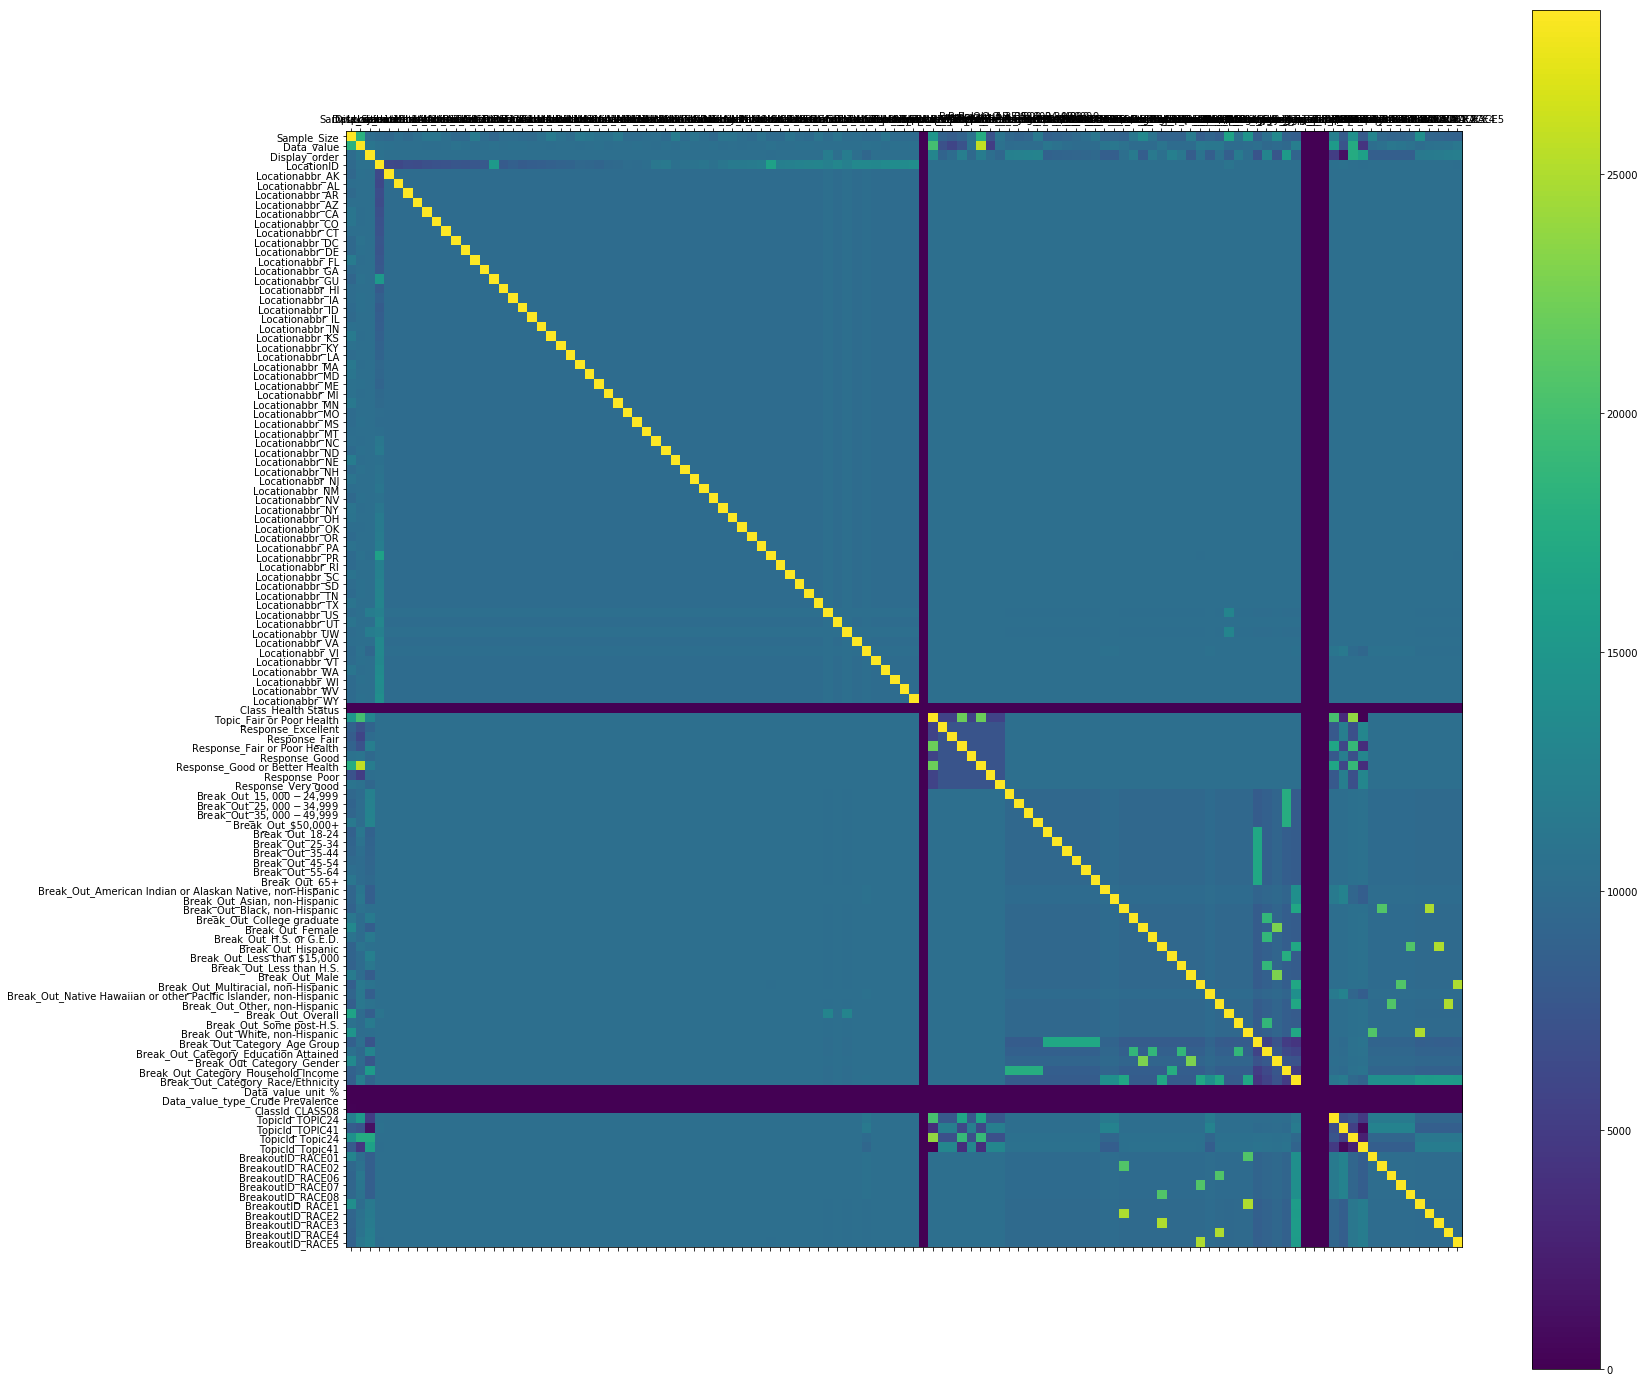

In [41]:
health.drop(columns = to_drop, axis=1, inplace = True)
plot_corr(health)